## Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

## 1.Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 2.Import the Data

In [3]:
cars_data = pd.read_csv('ToyotaCorolla.csv',usecols =(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]),index_col=False)
cars_data.reset_index(drop=True,inplace=True)

In [4]:
cars_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
#Renaming the columns 
cars_data=cars_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [6]:
cars_data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 3.Data Understanding

In [7]:
cars_data.shape

(1436, 9)

In [8]:
cars_data.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [9]:
cars_data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

## 4.EDA

In [10]:
#to check the duplicated rows
cars_data[cars_data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
#drop duplicated row and reset index
cars_data = cars_data.drop_duplicates().reset_index(drop=True)
cars_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
cars_data.shape

(1435, 9)

In [13]:
cars_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## 5.Correlation Analysis and plotting

In [14]:
cars_data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


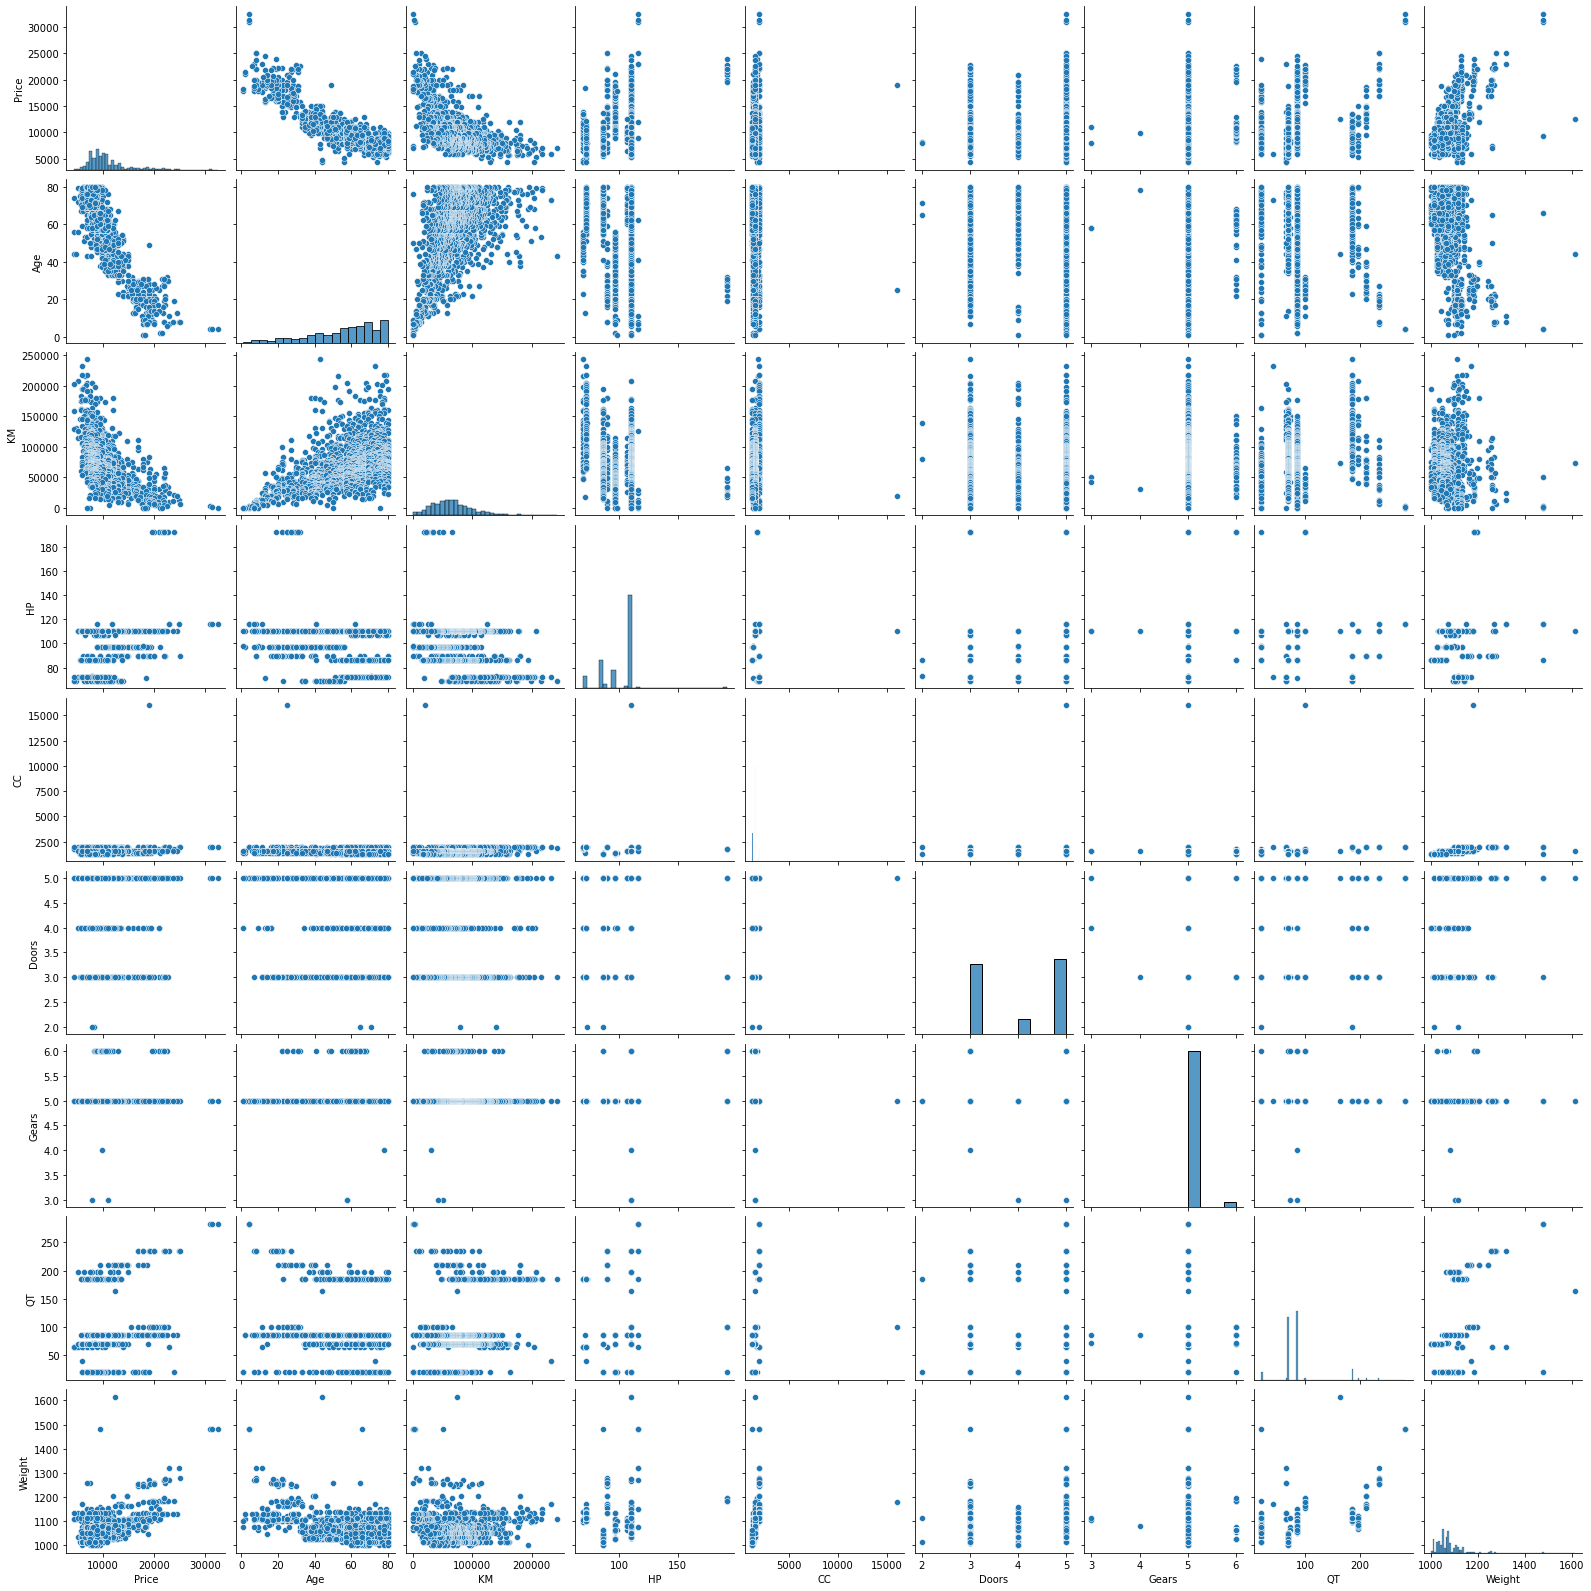

In [21]:
sns.pairplot(cars_data)
#age and km are linearly corelated to price

## 6. Model Building

In [15]:
X = cars_data.drop(labels = 'Price',axis=1).values
y = cars_data['Price'].values

In [16]:
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [17]:
y

array([13500, 13750, 13950, ...,  8500,  7250,  6950], dtype=int64)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
X_train.shape

(1148, 8)

In [20]:
X_test.shape

(287, 8)

## 7.Model Training

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.intercept_

-3835.8488897159095

In [24]:
model.coef_

array([-1.23907096e+02, -1.92437356e-02,  3.23669650e+01, -3.26403957e-02,
        1.83178023e+01,  6.01585066e+02,  3.12337405e+00,  1.51096748e+01])

## 8.Model Testing

In [25]:
y_test_pred = model.predict(X_test)
y_test_pred

array([ 9060.28274219, 12190.50352799,  8131.05849087,  7570.39490838,
       18467.35250092, 16243.1177111 ,  9564.44008229,  9161.98704737,
       15157.99289834, 10025.18712751, 12396.29603606,  6905.32315349,
       11476.6981765 ,  7761.33681451, 12957.4629648 ,  8760.15085869,
        7496.22231718,  8037.06318796, 11141.91664426, 10504.03417549,
        8868.63144837,  8202.14443743,  8165.96502755, 13822.3582329 ,
       13343.58121769,  8178.45791825, 11841.78610291, 11733.9399277 ,
       13644.23425365, 16364.62891165,  8703.70878179,  8687.06774237,
       10156.10067662,  9292.60904795,  8544.51317932,  8594.40252087,
        9194.96445901,  9620.73476501, 10126.838254  , 14041.07935415,
       11452.65424503, 11883.08605192, 15803.74166291,  9906.96198452,
        8407.62241094, 10558.97329472, 15093.8698752 , 10790.65809661,
        9446.63826102,  7092.14512899,  7700.38465904, 11056.91182444,
        7801.00490117, 12346.7577033 ,  5424.79296353,  6748.15919199,
      

In [26]:
old_score = r2_score(y_test,y_test_pred)
old_score

0.8670323701891862

In [28]:
##Using OLS MODEL
model = sm.OLS(y_train,X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.016e+04
Date:                Mon, 01 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:12:57   Log-Likelihood:                         -9882.7
No. Observations:                1148   AIC:                                  1.978e+04
Df Residuals:                    1140   BIC:                                  1.982e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------